# DESARROLLO CASO PRACTICO 3
##### Utilice el dataset del Titanic dado por la librería seaborn que contiene 15 columnas y 891 registros, el cual se trabajó en la unidad 1 realizando un preprocesamiento de datos y un análisis exploratorio de datos. Se pretende predecir la supervivencia de un pasajero en el naufragio del Titanic (sobrevivió=1, no sobrevivió=0) utilizando los algoritmos de clasificación revisados en la unidad 2, así como realizar la evaluación del rendimiento de los algoritmos usando las métricas y gráficas respectivas.

###  Analisis de Datos- Universidad de los Hemisferios
#### Maestría en Inteligencia Artificial Aplicada
#### Integrantes : Victoria Fárez | Wilfrido Almache | Christian Iza | Ruben Tocain

### 1. Importación de Librerías

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

### 2. Carga de dataset y revisión preliminar

In [3]:
# Cargar el dataset del Titanic desde seaborn
df = sns.load_dataset('titanic')

# Mostrar las primeras filas del DataFrame
print("Primeras Filas")
print(df.head())

# Información general sobre los datos
print("Información General")
print(df.info())

# Identificar valores nulos
print("Identificar NULLs")
print(df.isnull().sum())

#Columnas en dataset original
print("Columnas en dataset original")
print(df.columns)

Primeras Filas
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Información General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  --

### 3. EDA


========== Columnas en dataset 2 ==========

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
(891, 15)

========== Estadísticas Descriptivas ==========

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

==

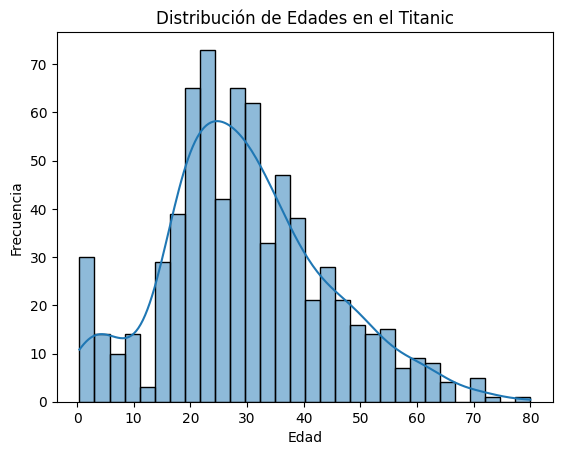

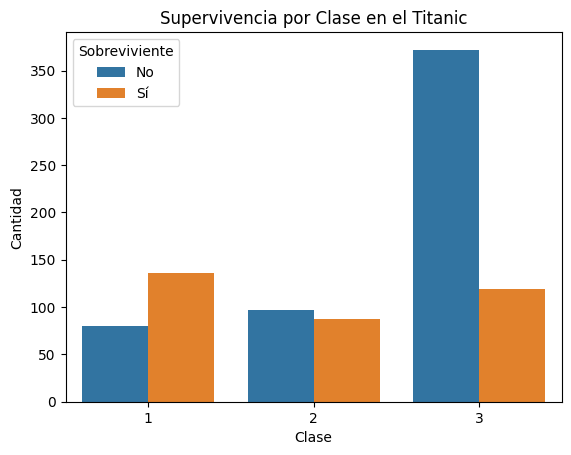

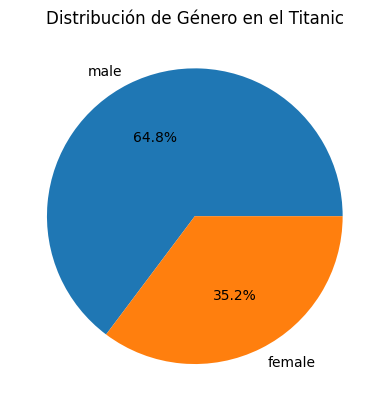

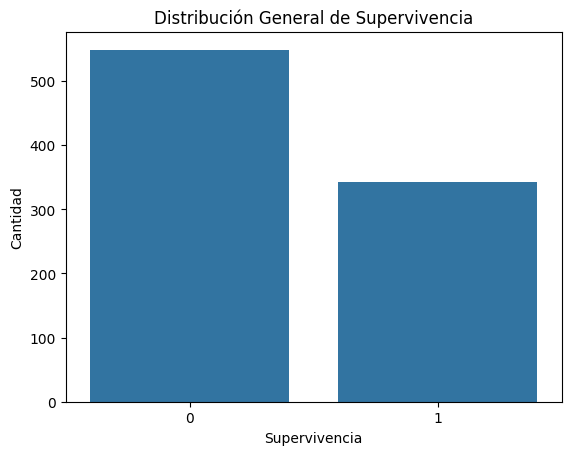

In [4]:

#Columnas en dataset original
print()
print("========== Columnas en dataset 2 ==========")
print()
print(df.columns)
print(df.shape)

# Estadísticas descriptivas
print()
print("========== Estadísticas Descriptivas ==========")
print()
print(df.describe())

# Estadísticas de variables categóricas
print()
print("========== Columnas de variables Categóricas ==========")
print()
print(df.describe(include=['object']))

# Histogramas de Edades:
#plt.figure(figsize=(8, 6))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades en el Titanic')
plt.show()

# Gráfico de Barras de Supervivencia por Clase:
#plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='pclass', hue='survived')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Supervivencia por Clase en el Titanic')
plt.legend(title='Sobreviviente', labels=['No', 'Sí'])
plt.show()

# Gráfico de Torta de Género:
#plt.figure(figsize=(8, 6))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Género en el Titanic')
plt.ylabel('')
plt.show()

# Gráfico de Distribución de Supervivencia General:
#plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df)
plt.xlabel('Supervivencia')
plt.ylabel('Cantidad')
plt.title('Distribución General de Supervivencia')
##plt.legend(title='Sobreviviente', labels=['No', 'Sí'])
plt.show()

### 4. Correlación

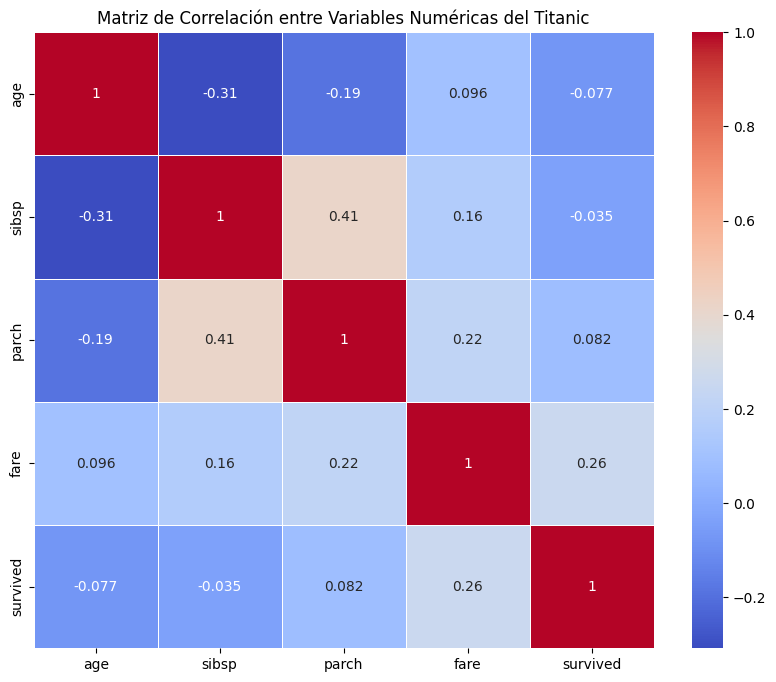

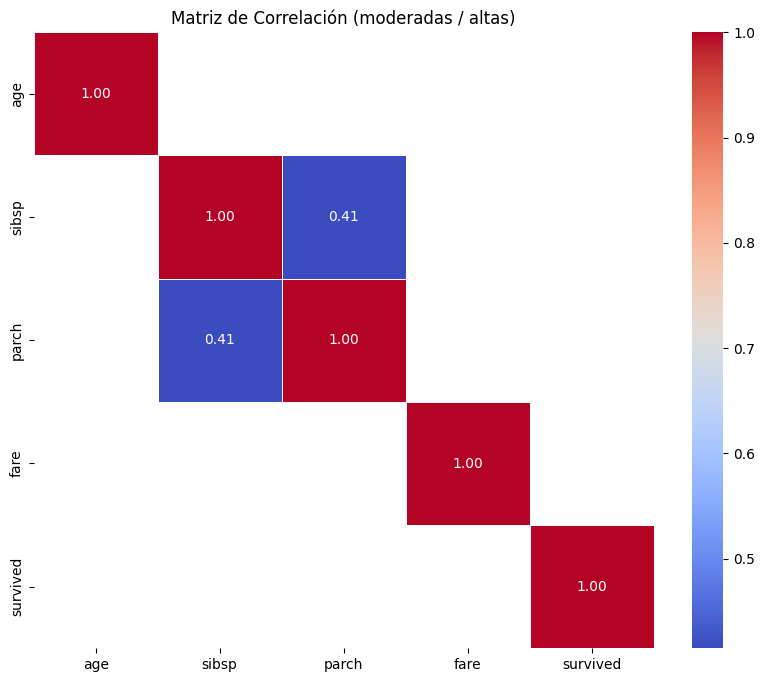

In [5]:
# Convertir variables categóricas en variables dummy

# Análisis de Correlación
# Se podría eliminar aquellas variables que tengan una correlación baja o nula
# con la variable objetivo, ya que podrían no aportar información relevante al modelo.
# Además, se podría quitar ciertas variables que están altamente correlacionadas entre sí.

# Seleccionar las variables numéricas principales para el análisis de correlación y el target
variables_numericas = ['age', 'sibsp', 'parch', 'fare', 'survived']

# Crear una submatriz de correlación
correlation_matrix = df[variables_numericas].corr()

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas del Titanic')
plt.show()

# Aplicar una máscara para mostrar solo correlaciones moderadas/altas mayores a 0.4
mask = np.abs(correlation_matrix) < 0.4
correlation_matrix[mask] = np.nan
# Crear un mapa de calor de correlación con valores significativos
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación (moderadas / altas)')
plt.show()

### 4. Preparación de los datos para el modelo

In [6]:

# Imputar valores faltantes
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])

# Separar las características (features) y la variable objetivo (target)
X = df.drop('survived', axis=1)
y = df['survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)()

ValueError: could not convert string to float: 'male'

### 4. Entranamiento

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Entrenar el modelo de Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Entrenar el modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Entrenar el modelo de KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


### 5. Evaluación del rendimiento de los modelos

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Evaluación del modelo de Decision Tree
dt_pred = dt_model.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# Evaluación del modelo de Regresión Logística
lr_pred = lr_model.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# Evaluación del modelo de KNN
knn_pred = knn_model.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# Curvas ROC y AUC
models = [("Decision Tree", dt_model), ("Logistic Regression", lr_model), ("KNN", knn_model)]
plt.figure(figsize=(10, 8))

for name, model in models:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
